Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

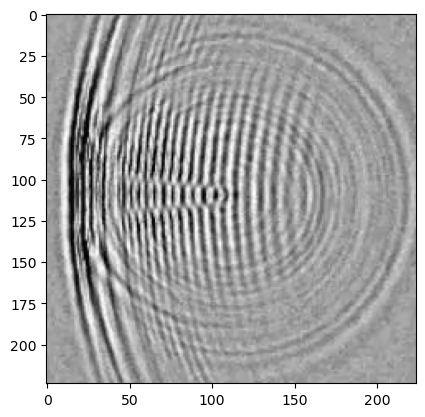

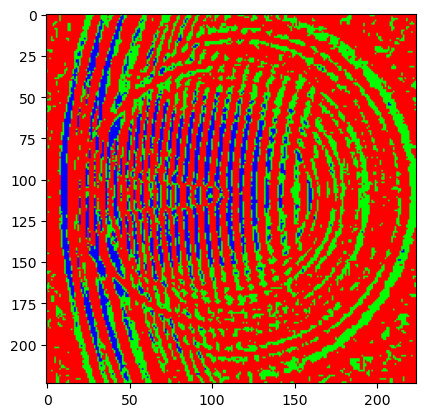

float64
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             161       0       0     255     255     255     145     107   
1             160       0       0     255     255     255     145     107   
2             159       0       0     255     255     255     145     107   
3             158       0       0     255     255     255     145     108   
4             159       0       0     255     255     255     146     109   

   Gabor8  Gabor9  ...  Canny Edge   Roberts     Sobel        Scharr  \
0      59       0  ...           0  0.005546  0.003922  3.921569e-03   
1      59       0  ...           0  0.006201  0.006577  6.470774e-03   
2      59       0  ...           0  0.003922  0.006278  6.088109e-03   
3      59       0  ...           0  0.003922  0.000000  1.962616e-17   
4      59       0  ...           0  0.007843  0.008319  8.318903e-03   

        Prewitt  Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  
0  3.921569e-03     

C:\Users\R\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy on training data =  0.9680783922936389
Accuracy =  0.967565143739724


C:\Users\R\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


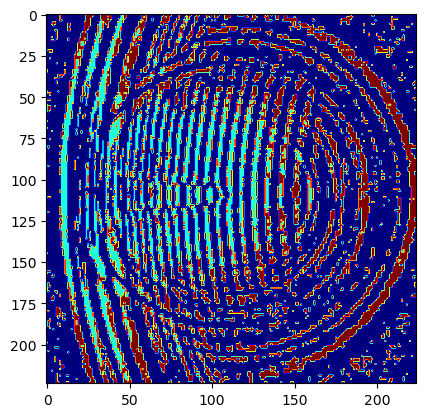

In [5]:
import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('ng.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
########################################
#Gerate OTHER FEATURES and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


######################################                

import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float, img_as_ubyte
from skimage import io
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.color import rgb2gray
from numpy import ones




img = img_as_float(io.imread("ng.jpg"))
img = rgb2gray(img_as_float(img)  ) # Convert to grayscale

sigma_est = np.mean(estimate_sigma(img))
nlm = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)
nlmu = img_as_ubyte(nlm)
print(nlm.dtype)
print(nlmu.dtype)
plt.imshow(nlm, cmap='gray')
plt.show()

#plt.hist(nlmu.flat, bins =1000, range= (0,255) )



seg1 = (nlmu <= 170)
seg2 = (nlmu > 170) & (nlmu <= 200)
seg3 = (nlmu > 200)



alls = np.zeros((nlmu.shape[0], nlmu.shape[1], 3))

alls[seg1] = (255,0,0)
alls[seg2] = (0,255,0)
alls[seg3] = (0,0,255)


uint8_array = alls.astype(np.uint8)
plt.imshow(uint8_array)

plt.show()

print (alls.dtype)


#########################################################
labeled_img1 = cv2.cvtColor(uint8_array, cv2.COLOR_BGR2GRAY)
labeled_img = labeled_img1.reshape(-1)
df['Labels'] = labeled_img

print(df.head())

#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

print(Y)

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


# Import the model we are using
#RandomForestRegressor is for regression type of problems. 
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer. 



###
#SVM
# Train the Linear SVM to compare against Random Forest
#SVM will be slower than Random Forest. 
#Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=100)  #Default of 100 is not converging





# Train the model on training data
model.fit(X_train, y_train)

# verify number of trees used. If not defined above. 
#print('Number of Trees used : ', model.n_estimators)

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
#First test prediction on the training data itself. SHould be good. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

#.predict just takes the .predict_proba output and changes everything 
#to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
#In this example we have 4 labels, so the probabilities will for each label stored separately. 
# 
#prediction_prob_test = model.predict_proba(X_test)

#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))



#This part commented out for SVM testing. Uncomment for random forest. 
#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
#feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
#print(feature_imp)


#You can store the model for future use. In fact, this is how you do machine elarning
#Train on training images, validate on test images and deploy the model on unknown images. 

import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')